# Lab 3

In [147]:
n = 24
N = (n + 4 ) % 5 + 1
N

4

## Variant 4
1, 3, 6, 7, 8, 12, 13, 14, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27

In [210]:
import numpy as np
import pandas as pd

# National Names
df = pd.read_csv('data/NationalNames.csv')
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


## Task 1

Виведіть перші 8 рядків набору даних.

In [149]:
df.iloc[0:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## Task 3

Отримайте імена стовпців набору даних

In [150]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

## Task 6

Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних

In [151]:
df.groupby(['Gender']).nunique()['Name'].to_frame()

,Name
Gender,
F,64911
M,39199


## Task 7

Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [152]:
df[(df['Gender'] == 'M') & (df['Year'] == 2010)][:5]

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


## Task 8

Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)

In [153]:
name_max_cnt = df.loc[df['Count'].idxmax()]

print(f"The name is '{name_max_cnt['Name']}' in {name_max_cnt['Year']}")

The name is 'Linda' in 1947


## Task 12

Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [154]:
df.loc[df[df['Year']==2008]['Count'].idxmax()]['Name']

'Jacob'

## Task 13

Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [155]:
idx = df[(df['Gender'] == 'F') & (df['Name'] == 'Jacob')]['Count'].idxmax()

df.loc[idx].to_frame().T

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


## Task 14

Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [255]:
# name gender counts
ngc = df.pivot_table(values='Count', index='Name', columns='Gender', aggfunc='sum')
# gender neutral names
gnn = ngc[(ngc['F'] > 0) & (ngc['M'] > 0)].index
# count of unique gender neutral names per year
un = df[df['Name'].isin(gnn)].groupby('Year')['Name'].nunique().to_frame()
# max count
un.loc[un.idxmax()]


,Name
Year,
2009,7372


## Task 15

Знайдіть загальну кількість народжень за рік.

In [157]:
df.groupby('Year').agg({'Count': 'sum'})[:5]

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


## Task 16

Знайдіть рік, коли народилося найбільше дітей

In [158]:
df.groupby('Year').agg({'Count': 'sum'}).idxmax()['Count']

1957

## Task 17

Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [159]:
df.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')[:5]

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


## Task 19

Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

<Axes: xlabel='Year'>

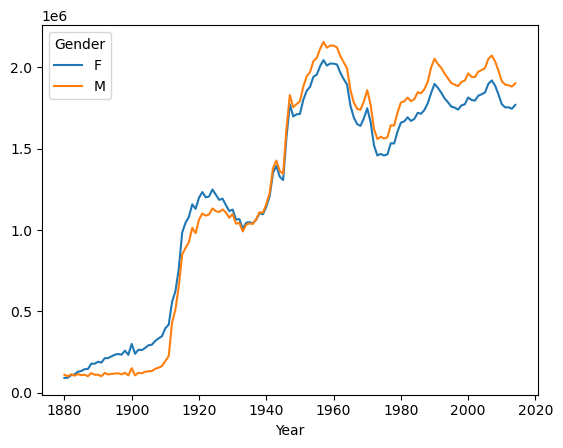

In [263]:
df.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum').plot()

## Task 20

Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)

In [257]:
# name gender counts
ngc = df.pivot_table(values='Count', index='Name', columns='Gender', aggfunc='sum')
# gender neutral names
gnn = ngc[(ngc['F'] > 0) & (ngc['M'] > 0)].index

len(gnn)

10221

## Task 22

Підрахуйте скільки років проводилось спостереження

In [265]:
years = df['Year'].nunique()

f'Спостереження проводилось {years} років'

'Спостереження проводилось 135 років'

## Task 23 (not from my variant)

Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [279]:
# name gender counts
ngc = df.pivot_table(values='Count', index='Name', columns='Gender', aggfunc='sum')
# gender neutral names
gnn = ngc[(ngc['F'] > 0) & (ngc['M'] > 0)]
# gender neutral names sum
gnns = gnn['F'] + gnn['M']

pd.DataFrame(gnns.sort_values(ascending=False).keys()[:15])


,Name
0,James
1,John
2,Robert
3,Michael
4,Mary
5,William
6,David
7,Joseph
8,Richard
9,Charles


# Task 24

Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів)

In [302]:
# unpopular names
un = df[df['Count'] == df['Count'].min()].groupby('Name')['Count'].sum()

name = un.idxmax()
count = un.loc[un.idxmax()]

f"Найбільш популяне серез непопулярних імен - це {name}. Ним назвали {count} разів."

'Найбільш популяне серез непопулярних імен - це Celester. Ним назвали 160 разів.'

## Task 25

Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі

<Axes: xlabel='Year'>

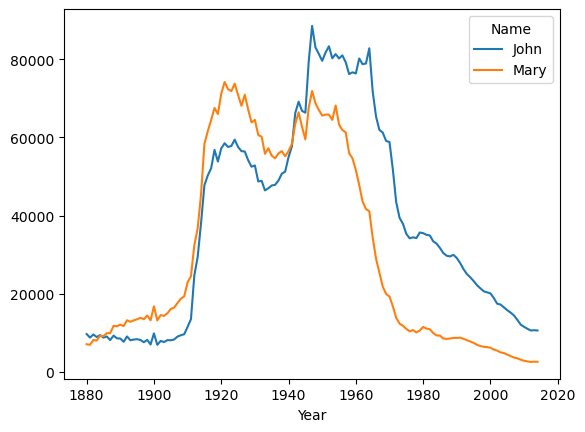

In [306]:
# Filter by name
fn = df[(df['Name'] == 'Mary') | (df['Name'] == 'John')]

fn.pivot_table(values='Count', index='Year', columns='Name', aggfunc='sum').plot()

## Task 26

Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

<Axes: xlabel='Year'>

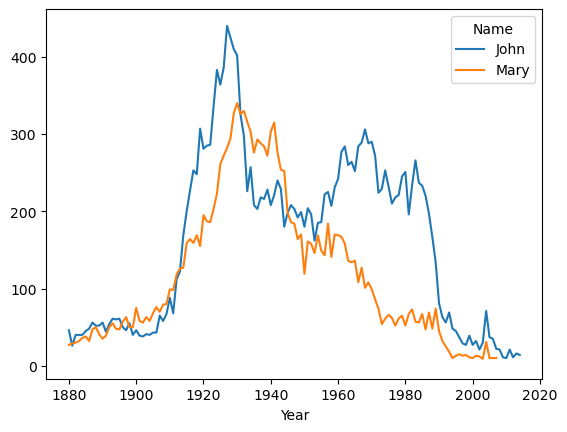

In [308]:
# Filter by name
fn = df[((df['Name'] == 'Mary') & (df['Gender'] == 'M')) | (df['Name'] == 'John') & (df['Gender'] == 'F')]

fn.pivot_table(values='Count', index='Year', columns='Name', aggfunc='sum').plot()

## Task 27

Знайти найпопулярніші імена в кожному році.

In [340]:
idx = df.groupby('Year')['Count'].idxmax()
df.loc[idx].set_index('Year')[['Name', 'Count']]


,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
